In [1]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from pandas_datareader import data
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import norm
import pyfolio as pf
%matplotlib inline

C:\Users\LAVANYA MARAN\anaconda3\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
import csv
df = pd.read_csv('Final_stock_data_V2.csv')
df

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
0,AAP,Advance Auto Parts Inc.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,214.1500,0.103398,1.308405e+10,...,1.25,9.550,0.1525,13.932986,22.424082,109.188247,12.97,0.171149,0.355467,0.049267
1,ABT,Abbott Laboratories,Healthcare,Increase,Above Fair Price,OverValued,Average,118.2900,0.181179,2.091710e+11,...,0.74,3.940,0.1318,22.924420,30.022842,51.234756,25.96,0.109154,0.249769,0.247649
2,ACN,Accenture plc,Technology,Increase,Above Fair Price,OverValued,Sustainable,323.9050,0.208836,2.047083e+11,...,1.21,9.613,0.1135,31.025385,33.694477,121.148794,9.45,0.166287,0.254874,0.245322
3,ADM,Archer-Daniels-Midland Company,Consumer Defensive,Increase,Above Fair Price,OverValued,Not Sustainable,76.9850,0.122815,4.327843e+10,...,0.81,4.790,0.0660,14.804809,16.072025,19.449588,36.42,0.117663,0.252289,0.150693
4,ADP,"Automatic Data Processing, Inc.",Industrials,Increase,Above Fair Price,OverValued,Sustainable,201.0100,0.182708,8.443324e+10,...,0.83,6.460,0.1371,26.483530,31.116098,90.801919,14.18,0.120094,0.272415,0.178939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,XRX,Xerox Holdings Corporation,Technology,Increase,Above Fair Price,UnderValued,No Data,20.6059,0.029031,3.678401e+09,...,1.75,1.459,-0.1600,10.302950,14.123303,0.609810,999.00,0.231929,0.405374,-0.032851
934,ZD,"Ziff Davis, Inc.",Communication Services,Increase,Above Fair Price,OverValued,No Data,102.4800,0.145864,4.941668e+09,...,1.01,4.120,0.1140,14.193907,24.873789,38.485339,999.00,0.141975,0.308007,0.055993
935,ZUMZ,Zumiez Inc.,Consumer Cyclical,Decrease,Above Fair Price,UnderValued,No Data,42.6600,0.035214,9.777245e+08,...,1.68,4.870,0.1500,9.233767,8.759754,21.330001,999.00,0.223419,0.513665,0.157523
936,ESNT,Essent Group Ltd.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,44.4800,0.082041,4.912015e+09,...,1.33,5.569,0.1555,7.339934,7.987071,23.215807,999.00,0.180874,0.502764,0.045034


<AxesSubplot:>

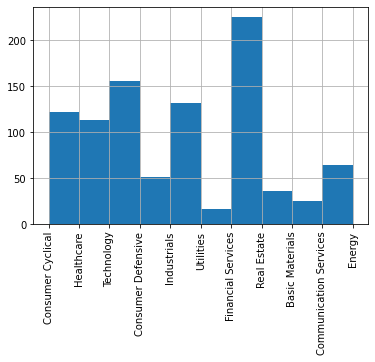

In [3]:
df['sector'].hist(xrot=90)

## Filter based on 2/3 criteria

In [4]:
def check_criteria(each):
    check = []
    if each["capm_status"] == "UnderValued":
        check.append(True)
    if each["Earnings_expectation"] == "Increase":
        check.append(True)
    if each["irv_status"] == "Below Fair Price":
        check.append(True)
    return check

In [5]:
def check_number(criteria):
    if len(criteria) >= 2:
        return True
    else:
        return False

In [6]:
rows = []
for i in range(938):
    each = df.iloc[i]
    criteria = check_criteria(each)
    result = check_number(criteria)
    if result:
        rows.append(i)

In [7]:
len(rows)

476

In [8]:
df = df.iloc[rows]
df

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
0,AAP,Advance Auto Parts Inc.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,214.1500,0.103398,1.308405e+10,...,1.25,9.550,0.1525,13.932986,22.424082,109.188247,12.97,0.171149,0.355467,0.049267
5,ADSK,"Autodesk, Inc.",Technology,Increase,Below Fair Price,UnderValued,Sustainable,217.3800,0.190997,4.781773e+10,...,1.43,5.928,0.2883,31.967648,36.670040,302.038344,15.45,0.193030,0.384894,0.209161
11,ALK,"Alaska Air Group, Inc.",Industrials,Increase,Above Fair Price,UnderValued,No Data,58.9750,0.141697,7.425660e+09,...,1.55,3.770,-0.2340,9.073076,15.643236,0.761055,999.00,0.207617,0.454054,-0.086043
12,ALLE,Allegion plc,Industrials,Increase,Above Fair Price,UnderValued,Average,114.1447,0.097180,1.023831e+10,...,1.14,5.086,0.0777,19.955368,22.442923,31.814578,23.59,0.157777,0.279213,0.118004
14,AMD,"Advanced Micro Devices, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,117.1100,0.319034,1.414232e+11,...,1.95,3.242,0.3532,35.062874,36.122765,253.245268,999.00,0.256240,0.564107,0.569607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,XOMA,XOMA Corporation,Healthcare,Increase,Above Fair Price,UnderValued,No Data,20.7600,-0.034853,2.348205e+08,...,0.81,0.082,0.1900,-90.260870,253.170730,14.120154,999.00,0.117663,0.689078,0.371572
932,XP,XP Inc.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,34.1100,-0.001020,1.908622e+10,...,1.91,0.986,0.0478,27.508064,34.594322,7.380346,999.00,0.251378,NaN,NaN
933,XRX,Xerox Holdings Corporation,Technology,Increase,Above Fair Price,UnderValued,No Data,20.6059,0.029031,3.678401e+09,...,1.75,1.459,-0.1600,10.302950,14.123303,0.609810,999.00,0.231929,0.405374,-0.032851
936,ESNT,Essent Group Ltd.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,44.4800,0.082041,4.912015e+09,...,1.33,5.569,0.1555,7.339934,7.987071,23.215807,999.00,0.180874,0.502764,0.045034


In [9]:
#total number of stocks for each sector 

df["sector"].value_counts()

Industrials               93
Technology                89
Consumer Cyclical         79
Financial Services        68
Healthcare                52
Communication Services    29
Basic Materials           20
Consumer Defensive        19
Energy                    15
Real Estate               11
Utilities                  1
Name: sector, dtype: int64

In [10]:
#df for each sector

df_basic_materials = df.loc[df['sector'] == 'Basic Materials']
df_communication = df.loc[df['sector'] == 'Communication Services']
df_consumer_c = df.loc[df['sector'] == 'Consumer Cyclical']
df_consumer_d = df.loc[df['sector'] == 'Consumer Defensive']
df_energy = df.loc[df['sector'] == 'Energy']
df_financial = df.loc[df['sector'] == 'Financial Services']
df_healthcare = df.loc[df['sector'] == 'Healthcare']
df_industrials = df.loc[df['sector'] == 'Industrials']
df_real_estate = df.loc[df['sector'] == 'Real Estate']
df_tech = df.loc[df['sector'] == 'Technology']
df_utilites = df.loc[df['sector'] == 'Utilities']

In [11]:
#sectors used in aggressive model: tech, healthcare, real estate, industrials, consumer cyclical

# Tech Sector

## Filtering Stocks based on Sharpe Ratio

In [12]:
def get_closeprice(ticker):    
    start_date = str(date.today().year - 5) +'-0'+ str(date.today().month) +'-'+ str(date.today().day)
    end_date = str(date.today())
    
    panel_data = data.DataReader([ticker],'yahoo', start_date, end_date)
    closes = panel_data[["Close", "Adj Close"]]
    
    return closes

In [13]:
def get_sharpe_ratio(ticker):
    
    closes = get_closeprice(ticker)
    adj_close = closes["Adj Close"]
    
    risk_free_ann_ret_rate = 0.0195  #assuming this rate based on the latest data
     
    #Rp
    returns_ts = adj_close.pct_change().dropna()
    
    #Average Rp
    avg_daily_ret = returns_ts.mean()

    #Average risk-free rate for the year (Annual rate / number of trading days to spread it out)
    returns_ts['RiskFree_Rate'] = risk_free_ann_ret_rate/252

    #Average Rf
    avg_rf_ret = returns_ts['RiskFree_Rate'].mean()

    #calculate sharpe ratio

    #Add the excess return columns for each ETF: Rp - Rf
    returns_ts['Excess_ret'] = returns_ts[ticker] - returns_ts['RiskFree_Rate']
    
    sharpe = ((avg_daily_ret[ticker] - avg_rf_ret) /returns_ts['Excess_ret'].std())*np.sqrt(252)

    return sharpe.round(3)

In [14]:
sharpe_list = []
for i in range(len(df_tech)):
    each = df_tech.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [15]:
sharpe_list

[0.609,
 1.019,
 0.771,
 0.426,
 0.799,
 0.387,
 0.172,
 0.441,
 0.608,
 0.561,
 0.534,
 0.754,
 0.476,
 0.07,
 0.2,
 0.522,
 0.712,
 1.387,
 1.057,
 0.084,
 0.489,
 0.839,
 0.152,
 0.375,
 0.138,
 0.477,
 0.286,
 -0.318,
 0.295,
 0.475,
 0.555,
 0.374,
 0.288,
 0.42,
 -0.258,
 0.439,
 0.819,
 0.894,
 0.18,
 -0.074,
 0.497,
 0.375,
 -0.008,
 0.091,
 0.396,
 0.506,
 0.469,
 0.091,
 0.549,
 0.669,
 0.114,
 0.687,
 0.657,
 0.536,
 0.566,
 0.533,
 0.379,
 0.309,
 0.655,
 0.044,
 0.044,
 0.162,
 0.093,
 0.497,
 0.779,
 0.204,
 0.286,
 -0.012,
 0.401,
 0.334,
 0.72,
 0.427,
 0.586,
 0.903,
 0.637,
 0.173,
 0.119,
 0.731,
 1.825,
 0.428,
 0.504,
 0.51,
 1.143,
 0.612,
 -0.102,
 0.045,
 0.695,
 0.028,
 0.081]

In [18]:
df_tech["sharpe"] = sharpe_list
df_tech

C:\Users\LAVANY~1\AppData\Local\Temp/ipykernel_3436/505389931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tech["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
5,ADSK,"Autodesk, Inc.",Technology,Increase,Below Fair Price,UnderValued,Sustainable,217.3800,0.190997,4.781773e+10,...,5.928,0.2883,31.967648,36.670040,302.038344,15.45,0.193030,0.384894,0.209161,0.609
14,AMD,"Advanced Micro Devices, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,117.1100,0.319034,1.414232e+11,...,3.242,0.3532,35.062874,36.122765,253.245268,999.00,0.256240,0.564107,0.569607,1.019
17,ANSS,"ANSYS, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,305.4575,0.163292,2.665208e+10,...,5.318,0.1118,38.470715,57.438416,112.688671,13.16,0.169933,0.316793,0.271663,0.771
57,CTSH,Cognizant Technology Solutions,Technology,Increase,Above Fair Price,UnderValued,Sustainable,85.7600,0.098598,4.556764e+10,...,3.545,0.1398,18.973452,24.191820,39.576018,17.47,0.156562,0.290279,0.115536,0.426
73,EPAM,"EPAM Systems, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,428.8350,0.408649,2.432335e+10,...,7.211,0.2850,38.391674,59.469560,582.247739,999.00,0.193030,0.376405,0.422642,0.799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,UEIC,Universal Electronics Inc.,Technology,Increase,Above Fair Price,UnderValued,No Data,32.0000,0.045029,4.192544e+08,...,1.707,0.1500,9.090909,18.746338,15.999999,999.00,0.162640,0.491506,-0.118525,-0.102
919,VSAT,"ViaSat, Inc.",Technology,Increase,Below Fair Price,UnderValued,No Data,41.2500,-0.011116,3.029557e+09,...,0.478,0.2460,85.937500,86.297070,42.440039,999.00,0.155346,0.431753,-0.081127,0.045
923,WDAY,"Workday, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,216.5600,0.160951,5.414000e+10,...,0.117,0.1579,60.831463,1850.940200,115.161464,13.09,0.183305,0.383779,0.213788,0.695
928,WTRH,Waitr Holdings Inc.,Technology,Increase,Above Fair Price,UnderValued,No Data,0.4474,-0.264822,6.456787e+07,...,0.043,0.2000,-5.592500,10.404651,0.328108,999.00,-0.137611,1.128303,-0.461342,0.028


In [19]:
df2_tech = df_tech[df_tech["sharpe"] > 0.6]
df2_tech

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
5,ADSK,"Autodesk, Inc.",Technology,Increase,Below Fair Price,UnderValued,Sustainable,217.3800,0.190997,4.781773e+10,...,5.928,0.2883,31.967648,36.670040,302.038344,15.45,0.193030,0.384894,0.209161,0.609
14,AMD,"Advanced Micro Devices, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,117.1100,0.319034,1.414232e+11,...,3.242,0.3532,35.062874,36.122765,253.245268,999.00,0.256240,0.564107,0.569607,1.019
17,ANSS,"ANSYS, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,305.4575,0.163292,2.665208e+10,...,5.318,0.1118,38.470715,57.438416,112.688671,13.16,0.169933,0.316793,0.271663,0.771
73,EPAM,"EPAM Systems, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,428.8350,0.408649,2.432335e+10,...,7.211,0.2850,38.391674,59.469560,582.247739,999.00,0.193030,0.376405,0.422642,0.799
155,NTAP,"NetApp, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,88.2150,0.095312,1.960825e+10,...,4.113,0.0880,16.009981,21.447847,26.785016,16.58,0.166287,0.373202,0.185306,0.608
176,QCOM,QUALCOMM Incorporated,Technology,Increase,Below Fair Price,UnderValued,Sustainable,165.6500,0.130769,1.855280e+11,...,7.870,0.2562,14.231099,21.048285,183.404501,18.00,0.173580,0.375961,0.297623,0.754
243,AOSL,Alpha and Omega Semiconductor L,Technology,Increase,Above Fair Price,UnderValued,No Data,49.2600,0.165397,1.299356e+09,...,2.612,0.1700,11.617925,18.859112,28.764485,999.00,0.330391,0.570794,0.201750,0.712
244,APPS,"Digital Turbine, Inc.",Technology,Increase,Below Fair Price,UnderValued,No Data,43.8000,0.278657,4.232205e+09,...,0.530,0.5000,20.372091,82.641510,239.323247,999.00,0.285415,0.719036,1.325025,1.387
249,ASML,ASML Holding N.V. - New York Re,Technology,Increase,Below Fair Price,OverValued,No Data,634.7900,0.341963,2.580256e+11,...,15.017,0.2980,32.420326,42.271423,943.608234,999.00,0.134681,0.360669,0.411064,1.057
258,AUDC,AudioCodes Ltd.,Technology,Increase,Below Fair Price,OverValued,No Data,27.6750,0.234188,9.141052e+08,...,1.028,0.2500,16.875000,26.921206,29.306718,999.00,0.084842,0.446357,0.362672,0.839


## Correlation between Stocks

In [20]:
def get_return_series(ticker):
    closes = get_closeprice(ticker)
    return_series_close = (closes['Close'].pct_change()+ 1).cumprod() - 1
    return return_series_close

In [21]:
returns_list = []
for i in range(len(df2_tech)):
    each = df2_tech.iloc[i]
    ticker = each["ticker"]
    returns = get_return_series(ticker)
    if (len(returns) == 1260):
        returns_list.append(returns)

In [22]:
returns_list

[Symbols         MGIC
 Date                
 2017-03-24       NaN
 2017-03-27 -0.012422
 2017-03-28 -0.018634
 2017-03-29 -0.018634
 2017-03-30 -0.024845
 ...              ...
 2022-03-18  1.309317
 2022-03-21  1.281988
 2022-03-22  1.304348
 2022-03-23  1.265838
 2022-03-24  1.286956
 
 [1260 rows x 1 columns],
 Symbols         NSIT
 Date                
 2017-03-24       NaN
 2017-03-27  0.002184
 2017-03-28 -0.009709
 2017-03-29 -0.004126
 2017-03-30  0.000971
 ...              ...
 2022-03-18  1.633980
 2022-03-21  1.655097
 2022-03-22  1.636893
 2022-03-23  1.593204
 2022-03-24  1.589078
 
 [1260 rows x 1 columns],
 Symbols               ON
 Date                    
 2017-03-24           NaN
 2017-03-27 -1.119895e-02
 2017-03-28  7.246354e-03
 2017-03-29 -2.220446e-16
 2017-03-30  1.581026e-02
 ...                  ...
 2022-03-18  3.079710e+00
 2022-03-21  3.079710e+00
 2022-03-22  3.096179e+00
 2022-03-23  2.978261e+00
 2022-03-24  3.188406e+00
 
 [1260 rows x 1 columns],
 Symbo

In [23]:
return_series_close = pd.concat(returns_list, axis=1)
return_series_close

Symbols,MGIC,NSIT,ON,POWI,RIOT,RMBS,TTD,UCTT,WDAY
Date,,,,,,,,,
2017-03-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-27,-0.012422,0.002184,-1.119895e-02,-0.000778,0.032641,-0.001546,0.033315,-0.000639,-0.000362
2017-03-28,-0.018634,-0.009709,7.246354e-03,0.010886,0.041543,0.001546,0.013048,-0.000639,0.009403
2017-03-29,-0.018634,-0.004126,-2.220446e-16,0.006221,0.190801,-0.001546,0.054414,0.012771,0.019650
2017-03-30,-0.024845,0.000971,1.581026e-02,0.013219,0.172107,0.007728,0.019711,0.033206,0.009042
...,...,...,...,...,...,...,...,...,...
2022-03-18,1.309317,1.633980,3.079710e+00,2.017418,4.795253,1.413447,18.103275,1.858876,1.936709
2022-03-21,1.281988,1.655097,3.079710e+00,1.957387,4.821959,1.411901,17.589672,1.773946,1.927547
2022-03-22,1.304348,1.636893,3.096179e+00,1.983515,5.157270,1.425811,17.808995,1.789911,1.943339


<AxesSubplot:xlabel='Date'>

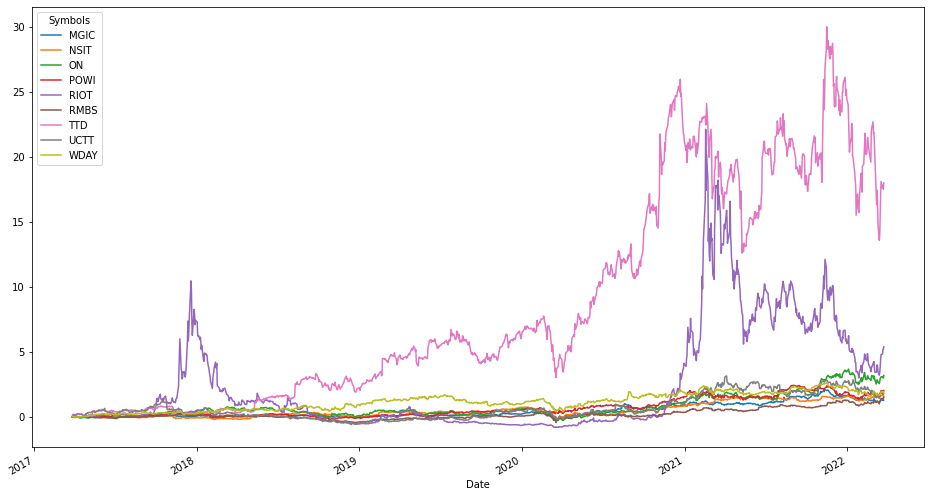

In [24]:
return_series_close.plot(figsize=(16,9))

In [25]:
highest = return_series_close[return_series_close.tail(1) > 5]

In [26]:
highest.dropna(axis=1, how="all")

Symbols,RIOT,TTD
Date,,
2017-03-24,NaN,NaN
2017-03-27,NaN,NaN
2017-03-28,NaN,NaN
2017-03-29,NaN,NaN
2017-03-30,NaN,NaN
...,...,...
2022-03-18,NaN,NaN
2022-03-21,NaN,NaN
2022-03-22,NaN,NaN


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

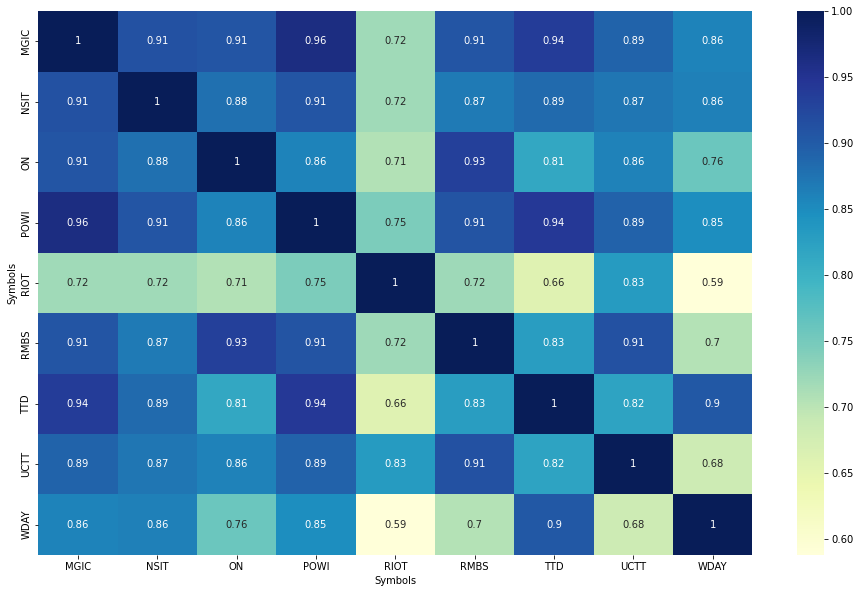

In [27]:
correlation = return_series_close.corr()
# correlation
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(correlation, annot = True, ax = ax, cmap="YlGnBu")

In [28]:
correlation = correlation[correlation < 0.1]
correlation

Symbols,MGIC,NSIT,ON,POWI,RIOT,RMBS,TTD,UCTT,WDAY
Symbols,,,,,,,,,
MGIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NSIT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
POWI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RIOT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RMBS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TTD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UCTT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WDAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Final DF for Tech

In [29]:
all_stocks = []
for each in correlation:
    all_stocks.append(each)

In [30]:
indexes = []
for i in range(len(df2_tech)):
    each = df2_tech.iloc[i]
    ticker = each["ticker"]
    if ticker in all_stocks:
        indexes.append(i)

In [31]:
chosen_tech_df = df2_tech.iloc[indexes]
chosen_tech_df #22 stocks for tech sector

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
639,MGIC,Magic Software Enterprises Ltd.,Technology,Increase,Above Fair Price,UnderValued,No Data,18.30,0.134997,9.082454e+08,...,0.570,0.1000,17.428572,32.105263,6.133024,999.00,0.188167,0.334100,0.227677,0.657
686,NSIT,"Insight Enterprises, Inc.",Technology,Increase,Above Fair Price,UnderValued,No Data,99.40,0.162830,3.467649e+09,...,5.767,0.0744,12.925878,17.235998,26.950686,999.00,0.234360,0.366896,0.221251,0.655
708,ON,ON Semiconductor Corporation,Technology,Increase,Below Fair Price,UnderValued,Average,58.44,0.204125,2.517794e+10,...,1.532,0.5545,17.926380,38.146214,440.267051,26.16,0.230713,0.507655,0.343777,0.779
751,POWI,"Power Integrations, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,87.75,0.172236,5.294107e+09,...,2.458,0.2529,26.753050,35.699757,94.882094,999.00,0.138328,0.396886,0.226355,0.720
781,RIOT,"Riot Blockchain, Inc",Technology,Increase,Above Fair Price,UnderValued,No Data,15.95,0.208131,1.859499e+09,...,0.188,0.2000,8.763736,84.840430,11.697185,999.00,0.539473,1.229896,0.422364,0.903
783,RMBS,"Rambus, Inc.",Technology,Increase,Above Fair Price,UnderValued,No Data,26.29,0.131836,2.875206e+09,...,0.002,0.0998,18.006850,13145.000000,8.796370,999.00,0.139544,0.349622,0.160927,0.637
890,TTD,"The Trade Desk, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,73.68,0.376786,3.793717e+10,...,0.561,0.2800,80.967030,131.336900,96.589249,999.00,0.302433,0.683392,0.956083,1.143
901,UCTT,"Ultra Clean Holdings, Inc.",Technology,Increase,Above Fair Price,UnderValued,No Data,45.85,0.183616,2.058665e+09,...,2.230,0.2000,9.713984,20.560537,33.624820,999.00,0.261103,0.610451,0.290763,0.612
923,WDAY,"Workday, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,216.56,0.160951,5.414000e+10,...,0.117,0.1579,60.831463,1850.940200,115.161464,13.09,0.183305,0.383779,0.213788,0.695


In [32]:
chosen_tech_df.to_csv("selected_stocks_tech.csv")

# Healthcare Sector

## Filtering Stocks based on Sharpe Ratio

In [33]:
sharpe_list = []
for i in range(len(df_healthcare)):
    each = df_healthcare.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [34]:
sharpe_list

[0.078,
 0.873,
 0.905,
 0.787,
 -0.177,
 -0.021,
 -0.025,
 0.386,
 0.642,
 -0.073,
 0.104,
 0.74,
 0.419,
 0.829,
 -0.005,
 0.441,
 0.289,
 0.687,
 0.58,
 0.548,
 0.595,
 0.058,
 0.21,
 0.43,
 0.336,
 0.073,
 0.345,
 0.82,
 -0.068,
 1.246,
 0.126,
 0.074,
 0.948,
 0.637,
 0.337,
 0.725,
 1.131,
 0.393,
 0.055,
 0.392,
 0.07,
 0.992,
 0.205,
 0.428,
 0.944,
 0.186,
 0.566,
 0.325,
 0.435,
 0.447,
 0.926,
 0.719]

In [35]:
df_healthcare["sharpe"] = sharpe_list
df_healthcare

C:\Users\LAVANY~1\AppData\Local\Temp/ipykernel_3436/4048192744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_healthcare["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
30,BIIB,Biogen Inc.,Healthcare,Increase,Above Fair Price,UnderValued,Not Sustainable,210.0000,0.060577,3.084753e+10,...,10.2170,-0.0650,11.332973,20.553978,1.630096e+01,20.62,0.072686,0.458651,-0.051561,0.078
56,CTLT,"Catalent, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,97.6100,0.171804,1.670966e+10,...,3.1770,0.1617,23.240477,30.723953,5.346009e+01,999.00,0.182089,0.359504,0.285814,0.873
102,IDXX,"IDEXX Laboratories, Inc.",Healthcare,Increase,Below Fair Price,OverValued,Not Sustainable,489.5600,0.272290,4.151156e+10,...,8.7180,0.2430,52.025505,56.155080,4.928736e+02,20.74,0.133466,0.305168,0.291234,0.905
106,IQV,"IQVIA Holdings, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,Sustainable,226.1600,0.183066,4.320561e+10,...,3.9290,0.2213,22.281775,57.561720,1.943151e+02,19.24,0.189383,0.301323,0.240998,0.787
212,WBA,"Walgreens Boots Alliance, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,Sustainable,46.1800,0.056427,3.989698e+10,...,2.9330,0.0293,9.054902,15.744970,8.511794e+00,18.38,0.086058,0.316630,-0.084159,-0.177
218,XRAY,DENTSPLY SIRONA Inc.,Healthcare,Increase,Below Fair Price,UnderValued,Not Sustainable,55.1800,0.044138,1.206273e+10,...,1.9020,0.2497,17.297806,29.011568,5.830732e+01,20.12,0.129819,0.322027,0.004033,-0.021
230,AGIO,"Agios Pharmaceuticals, Inc.",Healthcare,Increase,Below Fair Price,UnderValued,No Data,29.0000,-0.007540,1.574947e+09,...,24.9500,0.3900,-4.769737,1.162325,7.984002e+01,999.00,0.201539,0.510859,-0.078755,-0.025
255,ATRS,"Antares Pharma, Inc.",Healthcare,Decrease,Below Fair Price,UnderValued,No Data,3.4250,0.024070,5.823939e+08,...,0.3740,0.7890,19.027777,9.157754,9.137830e+01,999.00,0.205186,0.553134,0.087984,0.386
272,BDSI,BioDelivery Sciences Internatio,Healthcare,Increase,Below Fair Price,UnderValued,No Data,5.5600,0.091710,5.493052e+08,...,0.2900,0.2500,16.848484,19.172415,5.887818e+00,999.00,0.121310,0.565891,0.246627,0.642
277,BIOC,"Biocept, Inc.",Healthcare,Increase,Below Fair Price,UnderValued,No Data,2.2600,-0.560788,3.806337e+07,...,0.2190,0.4000,-2.132076,10.319634,6.636669e+00,999.00,0.084842,1.383791,-0.654186,-0.073


In [36]:
df2_healthcare = df_healthcare[df_healthcare["sharpe"] > 0.6]
df2_healthcare

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
56,CTLT,"Catalent, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,97.610,0.171804,1.670966e+10,...,3.177,0.1617,23.240477,30.723953,5.346009e+01,999.00,0.182089,0.359504,0.285814,0.873
102,IDXX,"IDEXX Laboratories, Inc.",Healthcare,Increase,Below Fair Price,OverValued,Not Sustainable,489.560,0.272290,4.151156e+10,...,8.718,0.2430,52.025505,56.155080,4.928736e+02,20.74,0.133466,0.305168,0.291234,0.905
106,IQV,"IQVIA Holdings, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,Sustainable,226.160,0.183066,4.320561e+10,...,3.929,0.2213,22.281775,57.561720,1.943151e+02,19.24,0.189383,0.301323,0.240998,0.787
272,BDSI,BioDelivery Sciences Internatio,Healthcare,Increase,Below Fair Price,UnderValued,No Data,5.560,0.091710,5.493052e+08,...,0.290,0.2500,16.848484,19.172415,5.887818e+00,999.00,0.121310,0.565891,0.246627,0.642
287,BRKR,Bruker Corporation,Healthcare,Increase,Above Fair Price,UnderValued,No Data,68.965,0.159607,1.045889e+10,...,1.771,0.2055,30.115719,38.941273,5.270151e+01,999.00,0.168718,0.333862,0.242053,0.740
310,CDMO,"Avid Bioservices, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,19.645,0.146303,1.209769e+09,...,0.136,0.1500,61.390630,144.448530,9.822500e+00,999.00,0.298786,0.688251,0.654617,0.829
351,CRSP,CRISPR Therapeutics AG,Healthcare,Increase,Above Fair Price,UnderValued,No Data,55.660,0.147264,4.259493e+09,...,5.263,-2.0040,-7.906250,10.575717,-8.200419e+00,999.00,0.272043,0.649606,0.295733,0.687
542,ICLR,ICON plc,Healthcare,Increase,Below Fair Price,OverValued,No Data,220.250,0.264338,1.792787e+10,...,2.939,0.2548,19.152174,74.940460,2.414215e+02,999.00,0.124956,0.296964,0.223068,0.820
554,INMD,InMode Ltd.,Healthcare,Increase,Below Fair Price,UnderValued,No Data,40.900,0.196788,3.124012e+09,...,1.736,0.3320,19.854370,23.559910,7.672746e+01,999.00,0.230713,NaN,NaN,1.246
631,MEDP,"Medpace Holdings, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,140.030,0.175529,5.032566e+09,...,4.830,0.1421,25.552920,28.991718,6.580331e+01,999.00,0.179658,0.498130,0.345048,0.948


## Correlation between Stocks

In [37]:
returns_list = []
for i in range(len(df2_healthcare)):
    each = df2_healthcare.iloc[i]
    ticker = each["ticker"]
    returns = get_return_series(ticker)
    if (len(returns) == 1260):
        returns_list.append(returns)

In [38]:
returns_list

[Symbols         CTLT
 Date                
 2017-03-24       NaN
 2017-03-27  0.014984
 2017-03-28  0.017124
 2017-03-29  0.020692
 2017-03-30  0.017124
 ...              ...
 2022-03-18  2.893685
 2022-03-21  2.844809
 2022-03-22  2.849090
 2022-03-23  2.745273
 2022-03-24  2.849804
 
 [1260 rows x 1 columns],
 Symbols         IDXX
 Date                
 2017-03-24       NaN
 2017-03-27  0.001431
 2017-03-28  0.000455
 2017-03-29  0.006374
 2017-03-30  0.005073
 ...              ...
 2022-03-18  2.528425
 2022-03-21  2.509757
 2022-03-22  2.593470
 2022-03-23  2.486796
 2022-03-24  2.514960
 
 [1260 rows x 1 columns],
 Symbols          IQV
 Date                
 2017-03-24       NaN
 2017-03-27  0.009104
 2017-03-28  0.009104
 2017-03-29  0.027696
 2017-03-30  0.024875
 ...              ...
 2022-03-18  1.919092
 2022-03-21  1.910245
 2022-03-22  1.935376
 2022-03-23  1.824849
 2022-03-24  1.880113
 
 [1260 rows x 1 columns],
 Symbols         BDSI
 Date                
 2017-03-24   

In [39]:
return_series_close = pd.concat(returns_list, axis=1)
return_series_close

Symbols,CTLT,IDXX,IQV,BDSI,BRKR,CDMO,CRSP,ICLR,MEDP,MODV,OPCH,OPRX,RGEN,TNDM,XOMA
Date,,,,,,,,,,,,,,,
2017-03-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-27,0.014984,0.001431,0.009104,0.085714,-0.019836,2.816908e-02,0.020134,0.000380,0.011891,0.006940,-0.021978,-0.074074,0.000866,0.0000,0.056213
2017-03-28,0.017124,0.000455,0.009104,0.085714,-0.024148,-1.408445e-02,0.142058,0.015961,0.011891,0.010641,-0.065934,-0.049383,0.003176,-0.0800,0.051775
2017-03-29,0.020692,0.006374,0.027696,0.085714,-0.015955,2.220446e-16,0.161633,0.022549,0.041992,0.023132,-0.032967,-0.024691,0.013279,-0.1200,0.026627
2017-03-30,0.017124,0.005073,0.024875,0.071429,-0.010349,-5.633798e-02,0.158837,0.016848,0.051654,0.023826,-0.049451,-0.024691,0.012413,-0.0400,0.020710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-18,2.893685,2.528425,1.919092,2.188571,1.959896,3.406439e+00,2.796980,2.033950,5.166852,1.584548,2.652472,16.567900,4.526270,8.2720,3.378698
2022-03-21,2.844809,2.509757,1.910245,2.197143,1.913325,3.356137e+00,2.672260,2.030403,5.096247,1.520472,2.629121,15.432098,4.429273,8.0712,3.366864
2022-03-22,2.849090,2.593470,1.935376,2.194286,1.925830,3.438632e+00,2.775168,2.080314,5.177257,1.633356,2.734890,16.024690,4.308603,8.1776,3.380177


<AxesSubplot:xlabel='Date'>

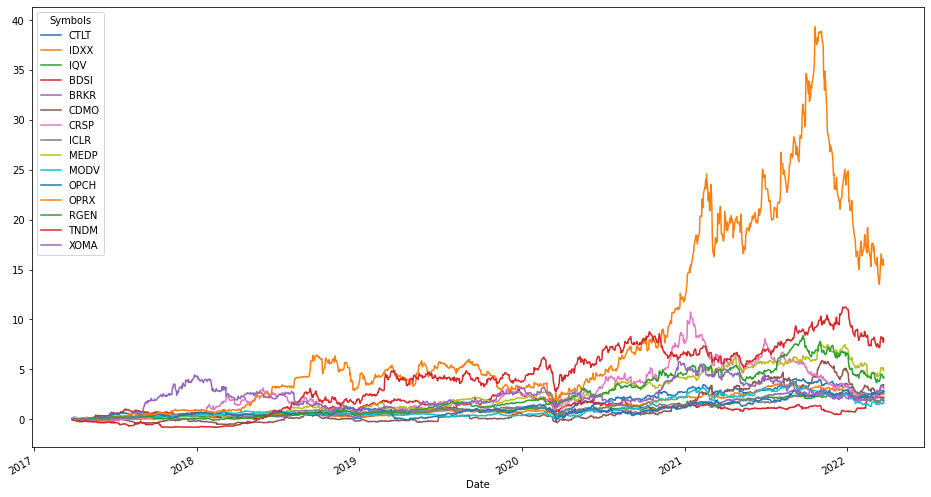

In [40]:
return_series_close.plot(figsize=(16,9))

In [41]:
highest = return_series_close[return_series_close.tail(1) > 5]

In [42]:
highest.dropna(axis=1, how="all")

Symbols,OPRX,TNDM
Date,,
2017-03-24,NaN,NaN
2017-03-27,NaN,NaN
2017-03-28,NaN,NaN
2017-03-29,NaN,NaN
2017-03-30,NaN,NaN
...,...,...
2022-03-18,NaN,NaN
2022-03-21,NaN,NaN
2022-03-22,NaN,NaN


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

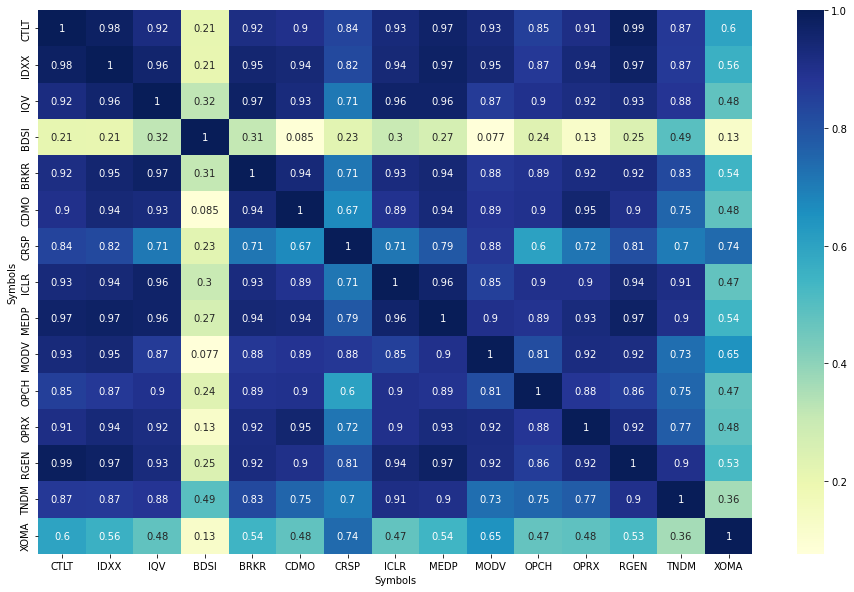

In [43]:
correlation = return_series_close.corr()
# correlation
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(correlation, annot = True, ax = ax, cmap="YlGnBu")

In [44]:
correlation = correlation[correlation < 0.1]
correlation

Symbols,CTLT,IDXX,IQV,BDSI,BRKR,CDMO,CRSP,ICLR,MEDP,MODV,OPCH,OPRX,RGEN,TNDM,XOMA
Symbols,,,,,,,,,,,,,,,
CTLT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IDXX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IQV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BDSI,NaN,NaN,NaN,NaN,NaN,0.085131,NaN,NaN,NaN,0.076535,NaN,NaN,NaN,NaN,NaN
BRKR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CDMO,NaN,NaN,NaN,0.085131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CRSP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ICLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MEDP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Final DF for Healthcare

In [45]:
all_stocks = []
for each in correlation:
    all_stocks.append(each)

In [46]:
indexes = []
for i in range(len(df2_healthcare)):
    each = df2_healthcare.iloc[i]
    ticker = each["ticker"]
    if ticker in all_stocks:
        indexes.append(i)

In [47]:
chosen_healthcare_df = df2_healthcare.iloc[indexes]
chosen_healthcare_df #15 stocks for healthcare sector

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
56,CTLT,"Catalent, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,97.610,0.171804,1.670966e+10,...,3.177,0.1617,23.240477,30.723953,5.346009e+01,999.00,0.182089,0.359504,0.285814,0.873
102,IDXX,"IDEXX Laboratories, Inc.",Healthcare,Increase,Below Fair Price,OverValued,Not Sustainable,489.560,0.272290,4.151156e+10,...,8.718,0.2430,52.025505,56.155080,4.928736e+02,20.74,0.133466,0.305168,0.291234,0.905
106,IQV,"IQVIA Holdings, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,Sustainable,226.160,0.183066,4.320561e+10,...,3.929,0.2213,22.281775,57.561720,1.943151e+02,19.24,0.189383,0.301323,0.240998,0.787
272,BDSI,BioDelivery Sciences Internatio,Healthcare,Increase,Below Fair Price,UnderValued,No Data,5.560,0.091710,5.493052e+08,...,0.290,0.2500,16.848484,19.172415,5.887818e+00,999.00,0.121310,0.565891,0.246627,0.642
287,BRKR,Bruker Corporation,Healthcare,Increase,Above Fair Price,UnderValued,No Data,68.965,0.159607,1.045889e+10,...,1.771,0.2055,30.115719,38.941273,5.270151e+01,999.00,0.168718,0.333862,0.242053,0.740
310,CDMO,"Avid Bioservices, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,19.645,0.146303,1.209769e+09,...,0.136,0.1500,61.390630,144.448530,9.822500e+00,999.00,0.298786,0.688251,0.654617,0.829
351,CRSP,CRISPR Therapeutics AG,Healthcare,Increase,Above Fair Price,UnderValued,No Data,55.660,0.147264,4.259493e+09,...,5.263,-2.0040,-7.906250,10.575717,-8.200419e+00,999.00,0.272043,0.649606,0.295733,0.687
542,ICLR,ICON plc,Healthcare,Increase,Below Fair Price,OverValued,No Data,220.250,0.264338,1.792787e+10,...,2.939,0.2548,19.152174,74.940460,2.414215e+02,999.00,0.124956,0.296964,0.223068,0.820
631,MEDP,"Medpace Holdings, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,140.030,0.175529,5.032566e+09,...,4.830,0.1421,25.552920,28.991718,6.580331e+01,999.00,0.179658,0.498130,0.345048,0.948
651,MODV,ModivCare Inc.,Healthcare,Increase,Below Fair Price,OverValued,No Data,101.510,0.209990,1.421120e+09,...,1.594,0.6845,13.552737,63.682560,1.575569e+03,999.00,0.090920,0.383729,0.202971,0.637


In [48]:
chosen_healthcare_df.to_csv("selected_stocks_healthcare.csv")

# Real Estate Sector

## Filtering Stocks based on Sharpe Ratio

In [49]:
sharpe_list = []
for i in range(len(df_real_estate)):
    each = df_real_estate.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [50]:
sharpe_list

[0.17, 0.667, 0.567, 0.822, 0.35, 0.797, 0.366, 0.446, -0.101, 0.168, 0.759]

In [51]:
df_real_estate["sharpe"] = sharpe_list
df_real_estate

C:\Users\LAVANY~1\AppData\Local\Temp/ipykernel_3436/2010124219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real_estate["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
35,BXP,"Boston Properties, Inc.",Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,121.005,0.052115,1.890183e+10,...,2.044,0.0700,39.673770,59.200100,31.618901,13.57,0.160209,0.318134,0.015426,0.170
39,CBRE,CBRE Group Inc,Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,99.530,0.182808,3.330930e+10,...,4.290,0.1100,17.647163,23.200466,36.186806,6.99,0.189383,0.351216,0.244065,0.667
74,EQIX,"Equinix, Inc.",Real Estate,Increase,Below Fair Price,OverValued,Sustainable,681.020,0.198920,6.131986e+10,...,4.743,0.3700,88.100910,143.584230,1645.638404,14.71,0.062961,0.272286,0.148163,0.567
184,SBAC,SBA Communications Corporation,Real Estate,Increase,Below Fair Price,OverValued,Sustainable,297.160,0.204253,3.232536e+10,...,2.606,1.8932,74.663315,114.029170,599909.754404,14.52,0.056883,0.267604,0.237268,0.822
365,CTRE,"CareTrust REIT, Inc.",Real Estate,Increase,Above Fair Price,UnderValued,No Data,17.580,0.133822,1.705837e+09,...,0.777,0.1020,17.580000,22.625483,5.988839,999.00,0.154131,0.425892,0.077533,0.350
416,EXPI,"eXp World Holdings, Inc.",Real Estate,Increase,Above Fair Price,UnderValued,No Data,25.150,0.156613,3.710555e+09,...,0.467,0.1000,36.985294,53.854390,8.428719,999.00,0.397249,NaN,NaN,0.797
485,GOOD,Gladstone Commercial Corporatio,Real Estate,Increase,Above Fair Price,UnderValued,No Data,21.090,0.095257,7.859906e+08,...,0.029,0.0600,-2109.000000,727.241400,5.064293,999.00,0.140759,0.386789,0.084844,0.366
581,LAMR,Lamar Advertising Company,Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,109.850,0.167806,1.112110e+10,...,3.689,0.0300,23.422174,29.777718,20.371571,16.28,0.194245,0.413550,0.128521,0.446
614,LSEA,Landsea Homes Corporation,Real Estate,Increase,Below Fair Price,UnderValued,No Data,6.560,-0.037662,3.036040e+08,...,0.531,0.4860,4.315790,12.354049,32.942956,999.00,0.036218,NaN,NaN,-0.101
906,UNIT,Uniti Group Inc.,Real Estate,Increase,Below Fair Price,UnderValued,No Data,11.085,-0.039440,2.616847e+09,...,0.171,0.3400,17.879032,64.824560,21.946654,999.00,0.146837,0.546158,-0.087307,0.168


In [52]:
df2_real_estate = df_real_estate[df_real_estate["sharpe"] > 0.6]
df2_real_estate

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
39,CBRE,CBRE Group Inc,Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,99.53,0.182808,3.330930e+10,...,4.290,0.1100,17.647163,23.200466,36.186806,6.99,0.189383,0.351216,0.244065,0.667
184,SBAC,SBA Communications Corporation,Real Estate,Increase,Below Fair Price,OverValued,Sustainable,297.16,0.204253,3.232536e+10,...,2.606,1.8932,74.663315,114.029170,599909.754404,14.52,0.056883,0.267604,0.237268,0.822
416,EXPI,"eXp World Holdings, Inc.",Real Estate,Increase,Above Fair Price,UnderValued,No Data,25.15,0.156613,3.710555e+09,...,0.467,0.1000,36.985294,53.854390,8.428719,999.00,0.397249,NaN,NaN,0.797
937,SAFE,Safehold Inc.,Real Estate,Increase,Below Fair Price,OverValued,No Data,60.47,0.133037,3.420177e+09,...,1.261,0.3690,34.752872,47.954006,145.164511,999.00,-0.016052,NaN,NaN,0.759


## Correlation between Stocks

In [53]:
returns_list = []
for i in range(len(df2_real_estate)):
    each = df2_real_estate.iloc[i]
    ticker = each["ticker"]
    returns = get_return_series(ticker)
    if (len(returns) == 1260):
        returns_list.append(returns)

In [54]:
returns_list

[Symbols         CBRE
 Date                
 2017-03-24       NaN
 2017-03-27 -0.019779
 2017-03-28 -0.011344
 2017-03-29 -0.001745
 2017-03-30  0.010471
 ...              ...
 2022-03-18  1.649505
 2022-03-21  1.625654
 2022-03-22  1.663758
 2022-03-23  1.598313
 2022-03-24  1.619546
 
 [1260 rows x 1 columns],
 Symbols         SBAC
 Date                
 2017-03-24       NaN
 2017-03-27 -0.004142
 2017-03-28  0.002198
 2017-03-29  0.012596
 2017-03-30  0.005326
 ...              ...
 2022-03-18  1.795080
 2022-03-21  1.769465
 2022-03-22  1.728295
 2022-03-23  1.709274
 2022-03-24  1.750951
 
 [1260 rows x 1 columns]]

In [55]:
return_series_close = pd.concat(returns_list, axis=1)
return_series_close

Symbols,CBRE,SBAC
Date,,
2017-03-24,NaN,NaN
2017-03-27,-0.019779,-0.004142
2017-03-28,-0.011344,0.002198
2017-03-29,-0.001745,0.012596
2017-03-30,0.010471,0.005326
...,...,...
2022-03-18,1.649505,1.795080
2022-03-21,1.625654,1.769465
2022-03-22,1.663758,1.728295


<AxesSubplot:xlabel='Date'>

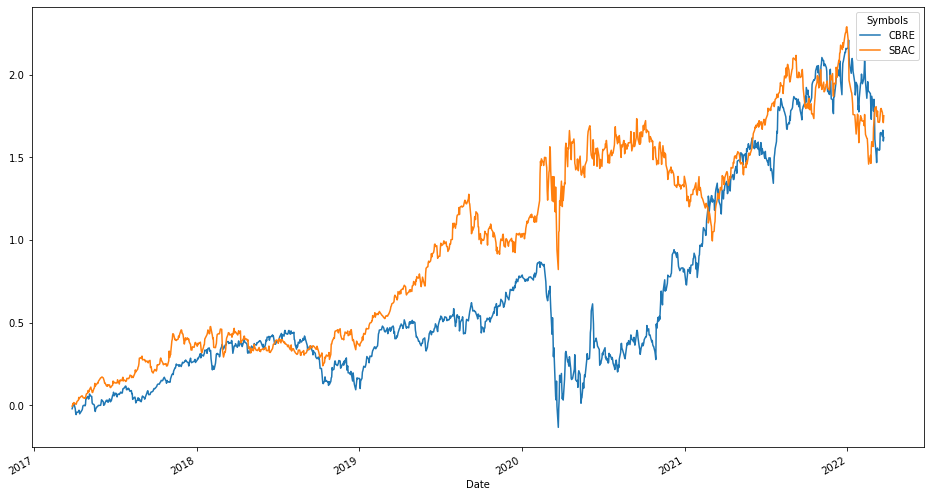

In [56]:
return_series_close.plot(figsize=(16,9))

In [57]:
highest = return_series_close[return_series_close.tail(1) > 5]

In [58]:
highest.dropna(axis=1, how="all")

Symbols
Date
2017-03-24
2017-03-27
2017-03-28
2017-03-29
2017-03-30
...
2022-03-18
2022-03-21
2022-03-22


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

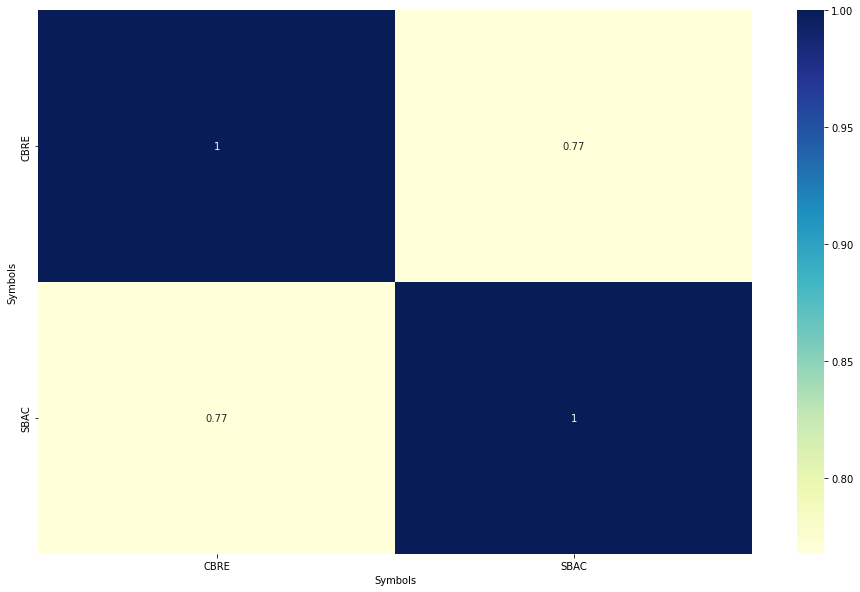

In [59]:
correlation = return_series_close.corr()
# correlation
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(correlation, annot = True, ax = ax, cmap="YlGnBu")

In [60]:
correlation = correlation[correlation < 0.1]
correlation

Symbols,CBRE,SBAC
Symbols,,
CBRE,NaN,NaN
SBAC,NaN,NaN


## Final DF for Real Estate

In [61]:
all_stocks = []
for each in correlation:
    all_stocks.append(each)

In [62]:
indexes = []
for i in range(len(df2_real_estate)):
    each = df2_real_estate.iloc[i]
    ticker = each["ticker"]
    if ticker in all_stocks:
        indexes.append(i)

In [63]:
chosen_realestate_df = df2_real_estate.iloc[indexes]
chosen_realestate_df #2 stocks for real estate sector

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
39,CBRE,CBRE Group Inc,Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,99.53,0.182808,3.330930e+10,...,4.290,0.1100,17.647163,23.200466,36.186806,6.99,0.189383,0.351216,0.244065,0.667
184,SBAC,SBA Communications Corporation,Real Estate,Increase,Below Fair Price,OverValued,Sustainable,297.16,0.204253,3.232536e+10,...,2.606,1.8932,74.663315,114.029170,599909.754404,14.52,0.056883,0.267604,0.237268,0.822


In [64]:
chosen_realestate_df.to_csv("selected_stocks_realestate.csv")

# Industrials Sector

## Filtering Stocks based on Sharpe Ratio

In [65]:
sharpe_list = []
for i in range(len(df_industrials)):
    each = df_industrials.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [66]:
sharpe_list

[-0.015,
 0.396,
 0.763,
 0.736,
 0.375,
 0.4,
 0.488,
 0.255,
 0.339,
 0.619,
 0.333,
 0.733,
 0.751,
 0.491,
 0.73,
 -0.026,
 1.24,
 0.53,
 0.405,
 0.313,
 0.669,
 0.504,
 0.184,
 0.253,
 0.21,
 0.722,
 0.037,
 0.393,
 0.101,
 0.876,
 -0.016,
 0.469,
 0.175,
 -0.331,
 0.32,
 0.238,
 0.351,
 0.234,
 0.442,
 0.637,
 0.556,
 0.332,
 0.477,
 0.3,
 0.612,
 -0.002,
 0.751,
 0.531,
 0.353,
 0.215,
 0.683,
 -0.174,
 0.446,
 0.183,
 0.64,
 0.352,
 0.796,
 0.406,
 0.453,
 0.095,
 0.554,
 -0.169,
 0.026,
 0.739,
 0.26,
 0.269,
 0.419,
 0.557,
 0.604,
 0.407,
 0.433,
 0.239,
 0.62,
 0.678,
 0.484,
 0.239,
 0.588,
 0.212,
 0.521,
 1.076,
 0.636,
 0.213,
 0.121,
 -0.093,
 0.529,
 1.017,
 0.375,
 0.205,
 0.44,
 0.647,
 0.38,
 0.294,
 0.484]

In [67]:
df_industrials["sharpe"] = sharpe_list
df_industrials

C:\Users\LAVANY~1\AppData\Local\Temp/ipykernel_3436/77830193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_industrials["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
11,ALK,"Alaska Air Group, Inc.",Industrials,Increase,Above Fair Price,UnderValued,No Data,58.9750,0.141697,7.425660e+09,...,3.770,-0.2340,9.073076,15.643236,0.761055,999.00,0.207617,0.454054,-0.086043,-0.015
12,ALLE,Allegion plc,Industrials,Increase,Above Fair Price,UnderValued,Average,114.1447,0.097180,1.023831e+10,...,5.086,0.0777,19.955368,22.442923,31.814578,23.59,0.157777,0.279213,0.118004,0.396
15,AME,"AMETEK, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Average,128.2800,0.155568,2.967437e+10,...,3.990,-0.0120,23.799630,32.150375,16.355389,25.95,0.178443,0.269622,0.206944,0.763
37,CAT,"Caterpillar, Inc.",Industrials,Increase,Below Fair Price,UnderValued,Not Sustainable,193.1600,0.084214,1.044884e+11,...,9.348,0.3224,17.721102,20.663244,339.525357,34.28,0.128603,0.314958,0.175801,0.736
45,CHRW,"C.H. Robinson Worldwide, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,92.0950,0.055239,1.197115e+10,...,5.646,0.1239,15.222314,16.311548,37.451959,19.83,0.111585,0.262005,0.071573,0.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,ULH,"Universal Logistics Holdings, I",Industrials,Increase,Above Fair Price,UnderValued,No Data,18.0900,0.030170,4.869738e+08,...,2.740,0.0300,5.566154,6.602190,3.354772,999.00,0.199108,0.403463,0.069257,0.440
908,USAK,"USA Truck, Inc.",Industrials,Increase,Below Fair Price,UnderValued,No Data,24.0400,0.108008,2.136505e+08,...,2.057,0.2760,9.246155,11.686924,30.639383,999.00,0.273259,0.638308,0.234642,0.647
918,VRRM,Verra Mobility Corporation,Industrials,Increase,Below Fair Price,UnderValued,No Data,17.2700,0.056159,2.695225e+09,...,0.058,0.3080,18.178947,297.758640,27.507524,999.00,0.196676,NaN,NaN,0.380
920,VSEC,VSE Corporation,Industrials,Increase,Above Fair Price,UnderValued,No Data,47.3300,0.148449,6.016543e+08,...,0.633,0.1960,12.198454,74.770935,33.682675,999.00,0.199108,0.472182,0.061138,0.294


In [68]:
df2_industrials = df_industrials[df_industrials["sharpe"] > 0.6]
df2_industrials

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
15,AME,"AMETEK, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Average,128.28,0.155568,2.967437e+10,...,3.990,-0.0120,23.799630,32.150375,16.355389,25.95,0.178443,0.269622,0.206944,0.763
37,CAT,"Caterpillar, Inc.",Industrials,Increase,Below Fair Price,UnderValued,Not Sustainable,193.16,0.084214,1.044884e+11,...,9.348,0.3224,17.721102,20.663244,339.525357,34.28,0.128603,0.314958,0.175801,0.736
92,GWW,"W.W. Grainger, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,474.32,0.106272,2.443697e+10,...,17.495,0.1538,20.304794,27.111746,244.306874,14.60,0.169933,0.317545,0.154030,0.619
107,IR,Ingersoll Rand Inc.,Industrials,Increase,Above Fair Price,UnderValued,No Data,53.31,0.123299,2.172836e+10,...,0.987,0.2177,23.077923,54.012160,44.602674,999.00,0.197892,NaN,NaN,0.733
112,J,Jacobs Engineering Group Inc.,Industrials,Increase,Above Fair Price,UnderValued,Average,120.31,0.101926,1.557449e+10,...,3.196,0.1303,14.636252,37.643930,51.491402,25.36,0.118879,0.291333,0.161099,0.751
125,LHX,"L3Harris Technologies, Inc.",Industrials,Increase,Below Fair Price,OverValued,No Data,220.65,0.203961,4.329704e+10,...,7.514,0.4180,16.129385,29.365185,726.908004,999.00,0.124956,0.273401,0.190286,0.730
158,ODFL,"Old Dominion Freight Line, Inc.",Industrials,Increase,Below Fair Price,OverValued,No Data,287.86,0.310243,3.310706e+10,...,8.087,0.2929,27.974731,35.595398,413.004855,999.00,0.143190,0.298006,0.382658,1.240
207,URI,"United Rentals, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,311.82,0.221984,2.257402e+10,...,16.534,0.2123,12.180469,18.859320,250.659605,18.26,0.251378,0.445386,0.191018,0.669
245,ARCB,ArcBest Corporation,Industrials,Increase,Below Fair Price,UnderValued,No Data,85.22,0.173652,2.178930e+09,...,6.407,0.3300,9.532439,13.301077,157.723259,999.00,0.219773,0.506692,0.230508,0.722
297,CAR,"Avis Budget Group, Inc.",Industrials,Increase,Below Fair Price,OverValued,No Data,152.02,0.278948,8.581165e+09,...,11.807,0.2750,7.791902,12.875413,192.389708,999.00,0.270827,0.807664,0.347936,0.876


## Correlation between Stocks

In [69]:
returns_list = []
for i in range(len(df2_industrials)):
    each = df2_industrials.iloc[i]
    ticker = each["ticker"]
    returns = get_return_series(ticker)
    if (len(returns) == 1260):
        returns_list.append(returns)

In [70]:
returns_list

[Symbols          AME
 Date                
 2017-03-24       NaN
 2017-03-27  0.001498
 2017-03-28  0.009547
 2017-03-29  0.014414
 2017-03-30  0.013104
 ...              ...
 2022-03-18  1.522651
 2022-03-21  1.521340
 2022-03-22  1.520030
 2022-03-23  1.481281
 2022-03-24  1.480345
 
 [1260 rows x 1 columns],
 Symbols          CAT
 Date                
 2017-03-24       NaN
 2017-03-27 -0.006945
 2017-03-28  0.008681
 2017-03-29  0.007705
 2017-03-30  0.011611
 ...              ...
 2022-03-18  1.397287
 2022-03-21  1.427672
 2022-03-22  1.416820
 2022-03-23  1.410960
 2022-03-24  1.411394
 
 [1260 rows x 1 columns],
 Symbols          GWW
 Date                
 2017-03-24       NaN
 2017-03-27 -0.009018
 2017-03-28 -0.001419
 2017-03-29 -0.007431
 2017-03-30 -0.023671
 ...              ...
 2022-03-18  1.095562
 2022-03-21  1.113556
 2022-03-22  1.098777
 2022-03-23  1.107544
 2022-03-24  1.092598
 
 [1260 rows x 1 columns],
 Symbols            J
 Date                
 2017-03-24   

In [71]:
return_series_close = pd.concat(returns_list, axis=1)
return_series_close

Symbols,AME,CAT,GWW,J,LHX,ODFL,URI,ARCB,CAR,ESEA,...,ISSC,KRNT,MGRC,MYRG,QRHC,RCII,SAIA,SBLK,TRNS,USAK
Date,,,,,,,,,,,,,,,,,,,,,
2017-03-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-27,0.001498,-0.006945,-0.009018,-0.007944,-0.000902,-0.002242,-0.009363,0.003953,-0.008430,-0.028571,...,0.000000,-0.011111,0.002144,0.024806,0.041860,0.021396,0.000000,0.004965,-0.001597,0.012363
2017-03-28,0.009547,0.008681,-0.001419,0.001108,0.007214,0.015107,0.021128,0.021739,0.004215,0.014286,...,-0.009901,0.000000,0.017764,0.039276,0.023256,0.024775,0.036300,0.162860,-0.009585,0.024725
2017-03-29,0.014414,0.007705,-0.007431,0.018105,0.002164,0.008143,0.024443,0.029644,0.022480,0.064286,...,0.006601,0.041667,0.020214,0.048320,0.055814,0.036036,0.031616,0.158888,0.010383,0.013736
2017-03-30,0.013104,0.011611,-0.023671,0.022169,0.008116,0.013690,0.028834,0.027668,0.033368,0.042857,...,-0.013201,0.058333,0.018683,0.055814,0.079070,0.047297,0.039813,0.191658,0.006390,0.004121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-18,1.522651,1.397287,1.095562,1.608904,1.222473,4.811991,1.868837,2.687352,8.944855,1.651786,...,1.580858,3.883333,1.599081,1.603876,2.120930,2.113739,5.838875,1.908640,5.256390,2.126374
2022-03-21,1.521340,1.427672,1.113556,1.584334,1.289296,4.661336,1.881763,2.596443,8.540921,1.724107,...,1.745875,3.636667,1.609801,1.617054,1.920930,1.970721,5.584075,1.938431,5.168530,2.115385
2022-03-22,1.520030,1.416820,1.098777,1.554775,1.272432,4.716747,1.952689,2.666798,8.827187,1.822322,...,1.778878,3.725555,1.603369,1.627907,1.976744,2.052928,5.716394,1.864946,5.161342,2.155220


<AxesSubplot:xlabel='Date'>

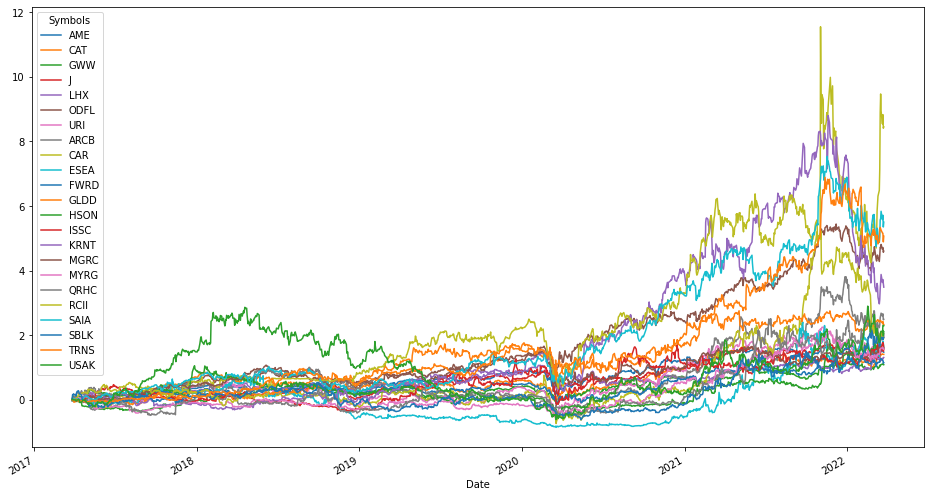

In [72]:
return_series_close.plot(figsize=(16,9))

In [73]:
highest = return_series_close[return_series_close.tail(1) > 5]

In [74]:
highest.dropna(axis=1, how="all")

Symbols,CAR,SAIA,TRNS
Date,,,
2017-03-24,NaN,NaN,NaN
2017-03-27,NaN,NaN,NaN
2017-03-28,NaN,NaN,NaN
2017-03-29,NaN,NaN,NaN
2017-03-30,NaN,NaN,NaN
...,...,...,...
2022-03-18,NaN,NaN,NaN
2022-03-21,NaN,NaN,NaN
2022-03-22,NaN,NaN,NaN


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

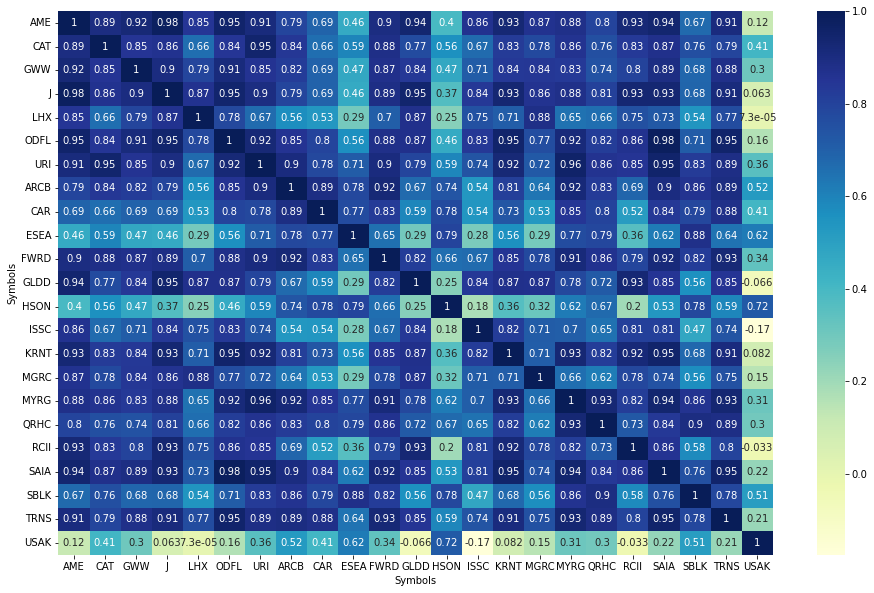

In [75]:
correlation = return_series_close.corr()
# correlation
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(correlation, annot = True, ax = ax, cmap="YlGnBu")

In [76]:
correlation = correlation[correlation < 0.1]
correlation

Symbols,AME,CAT,GWW,J,LHX,ODFL,URI,ARCB,CAR,ESEA,...,ISSC,KRNT,MGRC,MYRG,QRHC,RCII,SAIA,SBLK,TRNS,USAK
Symbols,,,,,,,,,,,,,,,,,,,,,
AME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GWW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.062726
LHX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000073
ODFL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
URI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ARCB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Final DF for Industrials

In [77]:
all_stocks = []
for each in correlation:
    all_stocks.append(each)

In [78]:
indexes = []
for i in range(len(df2_industrials)):
    each = df2_industrials.iloc[i]
    ticker = each["ticker"]
    if ticker in all_stocks:
        indexes.append(i)

In [79]:
chosen_industrials_df = df2_industrials.iloc[indexes]
chosen_industrials_df #22 stocks for industrials sector

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
15,AME,"AMETEK, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Average,128.28,0.155568,2.967437e+10,...,3.990,-0.0120,23.799630,32.150375,16.355389,25.95,0.178443,0.269622,0.206944,0.763
37,CAT,"Caterpillar, Inc.",Industrials,Increase,Below Fair Price,UnderValued,Not Sustainable,193.16,0.084214,1.044884e+11,...,9.348,0.3224,17.721102,20.663244,339.525357,34.28,0.128603,0.314958,0.175801,0.736
92,GWW,"W.W. Grainger, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,474.32,0.106272,2.443697e+10,...,17.495,0.1538,20.304794,27.111746,244.306874,14.60,0.169933,0.317545,0.154030,0.619
112,J,Jacobs Engineering Group Inc.,Industrials,Increase,Above Fair Price,UnderValued,Average,120.31,0.101926,1.557449e+10,...,3.196,0.1303,14.636252,37.643930,51.491402,25.36,0.118879,0.291333,0.161099,0.751
125,LHX,"L3Harris Technologies, Inc.",Industrials,Increase,Below Fair Price,OverValued,No Data,220.65,0.203961,4.329704e+10,...,7.514,0.4180,16.129385,29.365185,726.908004,999.00,0.124956,0.273401,0.190286,0.730
158,ODFL,"Old Dominion Freight Line, Inc.",Industrials,Increase,Below Fair Price,OverValued,No Data,287.86,0.310243,3.310706e+10,...,8.087,0.2929,27.974731,35.595398,413.004855,999.00,0.143190,0.298006,0.382658,1.240
207,URI,"United Rentals, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,311.82,0.221984,2.257402e+10,...,16.534,0.2123,12.180469,18.859320,250.659605,18.26,0.251378,0.445386,0.191018,0.669
245,ARCB,ArcBest Corporation,Industrials,Increase,Below Fair Price,UnderValued,No Data,85.22,0.173652,2.178930e+09,...,6.407,0.3300,9.532439,13.301077,157.723259,999.00,0.219773,0.506692,0.230508,0.722
297,CAR,"Avis Budget Group, Inc.",Industrials,Increase,Below Fair Price,OverValued,No Data,152.02,0.278948,8.581165e+09,...,11.807,0.2750,7.791902,12.875413,192.389708,999.00,0.270827,0.807664,0.347936,0.876
410,ESEA,Euroseas Ltd.,Industrials,Increase,Above Fair Price,UnderValued,No Data,26.80,-0.182789,1.941630e+08,...,2.966,0.0500,2.286689,9.035738,5.909189,999.00,0.065392,0.931402,0.144480,0.637


In [80]:
chosen_industrials_df.to_csv("selected_stocks_industrials.csv")

# Consumer Cyclical Sector

## Filtering Stocks based on Sharpe Ratio

In [81]:
sharpe_list = []
for i in range(len(df_consumer_c)):
    each = df_consumer_c.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [82]:
sharpe_list

[0.349,
 0.464,
 0.63,
 0.429,
 0.4,
 0.11,
 0.711,
 0.423,
 0.479,
 0.59,
 0.506,
 0.143,
 0.324,
 1.234,
 0.175,
 0.252,
 0.174,
 0.009,
 0.302,
 0.201,
 0.135,
 0.217,
 0.072,
 0.117,
 0.867,
 0.23,
 0.903,
 0.444,
 0.411,
 0.178,
 0.463,
 0.504,
 0.53,
 0.435,
 0.291,
 0.071,
 0.302,
 0.784,
 0.731,
 0.344,
 0.626,
 0.371,
 0.717,
 0.161,
 0.392,
 0.357,
 0.541,
 -0.122,
 0.372,
 -0.006,
 0.507,
 0.172,
 0.542,
 0.175,
 0.969,
 0.617,
 0.41,
 0.667,
 0.089,
 -0.008,
 0.366,
 0.397,
 0.062,
 0.711,
 0.661,
 0.332,
 0.391,
 0.456,
 0.386,
 0.443,
 0.226,
 0.477,
 0.096,
 0.221,
 0.507,
 0.255,
 0.234,
 0.229,
 0.211]

In [83]:
df_consumer_c["sharpe"] = sharpe_list
df_consumer_c

C:\Users\LAVANY~1\AppData\Local\Temp/ipykernel_3436/4197417276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_consumer_c["sharpe"] = sharpe_list


,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
0,AAP,Advance Auto Parts Inc.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,214.1500,0.103398,1.308405e+10,...,9.550,0.1525,13.932986,22.424082,1.091882e+02,12.97,0.171149,0.355467,0.049267,0.349
21,APTV,Aptiv PLC,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Sustainable,139.9800,0.197323,3.786655e+10,...,2.941,0.4626,30.364424,47.596054,6.093763e+02,13.49,0.274474,0.428095,0.175759,0.464
65,DHI,"D.R. Horton, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,Average,81.3366,0.204622,2.897055e+10,...,11.410,0.1060,5.326562,7.128537,2.862672e+01,22.55,0.217341,0.370627,0.238886,0.630
80,F,Ford Motor Company,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Average,17.4300,0.074129,6.965446e+10,...,0.713,0.7767,8.758794,24.446003,4.370325e+02,29.57,0.150484,0.375582,0.108521,0.429
91,GPC,Genuine Parts Company,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,124.8900,0.103717,1.778708e+10,...,5.609,0.0460,17.202478,22.266000,2.660739e+01,12.53,0.150484,0.294242,0.076618,0.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,TXRH,"Texas Roadhouse, Inc.",Consumer Cyclical,Increase,Below Fair Price,OverValued,No Data,87.7900,0.199828,6.114135e+09,...,3.020,0.8417,24.251383,29.069536,3.041617e+03,999.00,0.145622,0.401041,0.159949,0.507
907,URBN,"Urban Outfitters, Inc.",Consumer Cyclical,Increase,Below Fair Price,UnderValued,No Data,25.3600,-0.015427,2.482336e+09,...,2.987,3.1615,8.128205,8.490124,1.349236e+06,999.00,0.203970,0.503745,0.001591,0.255
910,VC,Visteon Corporation,Consumer Cyclical,Increase,Below Fair Price,UnderValued,No Data,131.3900,0.155275,3.678473e+09,...,0.984,0.9518,30.204597,133.526410,7.676611e+03,999.00,0.268396,0.463500,0.066498,0.234
917,VRA,"Vera Bradley, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,No Data,7.7900,-0.141295,2.627583e+08,...,0.607,0.1630,10.116883,12.833608,4.309673e+00,999.00,0.240438,0.593731,-0.064284,0.229


In [84]:
df2_consumer_c = df_consumer_c[df_consumer_c["sharpe"] > 0.6]
df2_consumer_c

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
65,DHI,"D.R. Horton, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,Average,81.3366,0.204622,2.897055e+10,...,11.410,0.1060,5.326562,7.128537,2.862672e+01,22.55,0.217341,0.370627,0.238886,0.630
98,HLT,Hilton Worldwide Holdings Inc.,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Sustainable,147.9550,0.134492,4.123831e+10,...,0.140,2.7265,34.408140,1056.821400,2.914266e+06,19.95,0.168718,0.314619,0.209851,0.711
199,TSLA,"Tesla, Inc.",Consumer Cyclical,Increase,Below Fair Price,OverValued,Average,806.0500,0.609586,8.094838e+11,...,3.062,0.7295,92.014840,263.242980,1.586122e+04,28.54,0.267181,0.611157,0.739589,1.234
321,CHDN,"Churchill Downs, Incorporated",Consumer Cyclical,Increase,Below Fair Price,OverValued,No Data,214.5100,0.285760,8.204814e+09,...,5.574,2.0990,23.598460,38.484030,8.037688e+05,999.00,0.165071,0.428761,0.357716,0.867
326,CLAR,Clarus Corporation,Consumer Cyclical,Increase,Below Fair Price,UnderValued,No Data,21.4100,0.104810,7.919045e+08,...,0.554,0.3290,13.993464,38.646206,3.935781e+01,999.00,0.122525,0.393534,0.306635,0.903
437,FIVE,"Five Below, Inc.",Consumer Cyclical,Increase,Below Fair Price,OverValued,No Data,159.6400,0.196712,8.943895e+09,...,4.662,0.4612,27.242321,34.242813,6.889982e+02,999.00,0.178443,0.452922,0.332526,0.784
442,FLL,"Full House Resorts, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,No Data,8.7500,0.119495,2.994906e+08,...,0.331,0.1500,19.444445,26.435045,4.375000e+00,999.00,0.240438,0.704348,0.296359,0.731
447,FNKO,"Funko, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,No Data,17.1200,0.092467,6.835999e+08,...,1.037,0.0270,11.972029,16.509163,3.092625e+00,999.00,0.293924,NaN,NaN,0.626
452,FOXF,Fox Factory Holding Corp.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,No Data,120.9000,0.205780,5.090374e+09,...,3.731,0.1500,23.613281,32.404182,6.045000e+01,999.00,0.230713,0.462622,0.367678,0.717
616,LULU,lululemon athletica inc.,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Sustainable,304.5800,0.164012,3.938189e+10,...,6.661,0.2790,32.927567,45.725870,3.964841e+02,16.06,0.179658,0.392863,0.361296,0.969


## Correlation between Stocks

In [85]:
returns_list = []
for i in range(len(df2_consumer_c)):
    each = df2_consumer_c.iloc[i]
    ticker = each["ticker"]
    returns = get_return_series(ticker)
    if (len(returns) == 1260):
        returns_list.append(returns)

In [86]:
returns_list

[Symbols          DHI
 Date                
 2017-03-24       NaN
 2017-03-27 -0.005117
 2017-03-28  0.001505
 2017-03-29  0.004515
 2017-03-30  0.006321
 ...              ...
 2022-03-18  1.580975
 2022-03-21  1.496087
 2022-03-22  1.492173
 2022-03-23  1.364238
 2022-03-24  1.372968
 
 [1260 rows x 1 columns],
 Symbols          HLT
 Date                
 2017-03-24       NaN
 2017-03-27 -0.007889
 2017-03-28  0.006174
 2017-03-29  0.005145
 2017-03-30  0.007889
 ...              ...
 2022-03-18  1.603155
 2022-03-21  1.578460
 2022-03-22  1.596810
 2022-03-23  1.545190
 2022-03-24  1.604870
 
 [1260 rows x 1 columns],
 Symbols          TSLA
 Date                 
 2017-03-24        NaN
 2017-03-27   0.026828
 2017-03-28   0.054302
 2017-03-29   0.054036
 2017-03-30   0.056088
 ...               ...
 2022-03-18  16.202273
 2022-03-21  16.501899
 2022-03-22  17.885469
 2022-03-23  17.982938
 2022-03-24  18.264326
 
 [1260 rows x 1 columns],
 Symbols         CHDN
 Date                
 

In [87]:
return_series_close = pd.concat(returns_list, axis=1)
return_series_close

Symbols,DHI,HLT,TSLA,CHDN,CLAR,FIVE,FLL,FOXF,LULU,MBUU,MCRI,RICK,RUSHA
Date,,,,,,,,,,,,,
2017-03-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-27,-0.005117,-0.007889,0.026828,0.005500,0.009174,-0.000938,-0.004219,0.010526,0.006594,-0.014829,0.014211,-0.007139,-0.013154
2017-03-28,0.001505,0.006174,0.054302,0.021999,-0.009174,0.013139,-0.008439,0.007018,-0.000157,0.021316,0.012132,-0.017252,0.005011
2017-03-29,0.004515,0.005145,0.054036,0.023940,-0.027523,0.040826,0.021097,0.005263,0.040980,0.035218,0.028076,-0.019631,0.013154
2017-03-30,0.006321,0.007889,0.056088,0.026852,0.009174,0.029329,0.004220,0.003509,-0.203015,0.028267,0.027383,-0.013682,0.019731
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-18,1.580975,1.603155,16.202273,3.543384,3.443732,2.851947,3.489452,2.785263,3.976134,1.840130,1.994801,2.815586,1.488412
2022-03-21,1.496087,1.578460,16.501899,3.429246,3.372029,2.832473,3.367089,2.689474,3.839378,1.842910,1.938995,2.741821,1.493110
2022-03-22,1.492173,1.596810,17.885469,3.484956,3.414315,2.912248,3.350211,2.726316,3.946302,1.873494,1.951126,2.740036,1.485124


<AxesSubplot:xlabel='Date'>

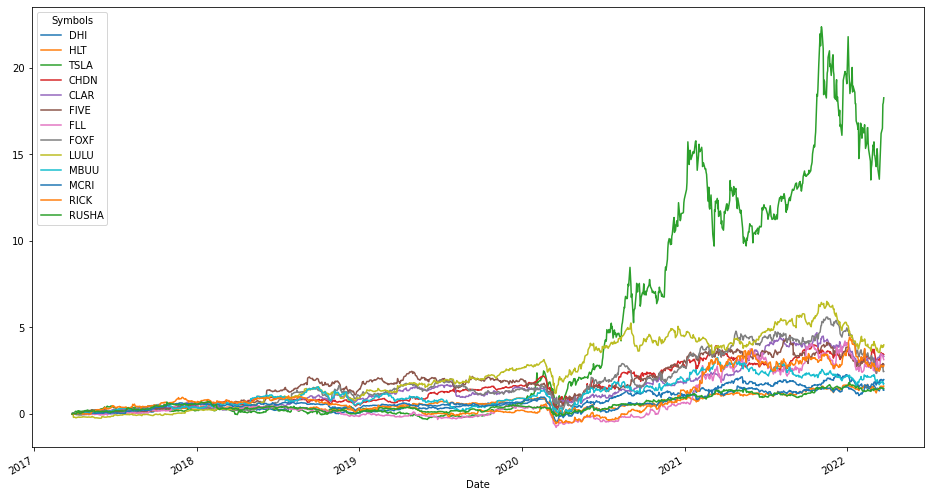

In [88]:
return_series_close.plot(figsize=(16,9))

In [89]:
highest = return_series_close[return_series_close.tail(1) > 5]

In [90]:
highest.dropna(axis=1, how="all")

Symbols,TSLA
Date,
2017-03-24,NaN
2017-03-27,NaN
2017-03-28,NaN
2017-03-29,NaN
2017-03-30,NaN
...,...
2022-03-18,NaN
2022-03-21,NaN
2022-03-22,NaN


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

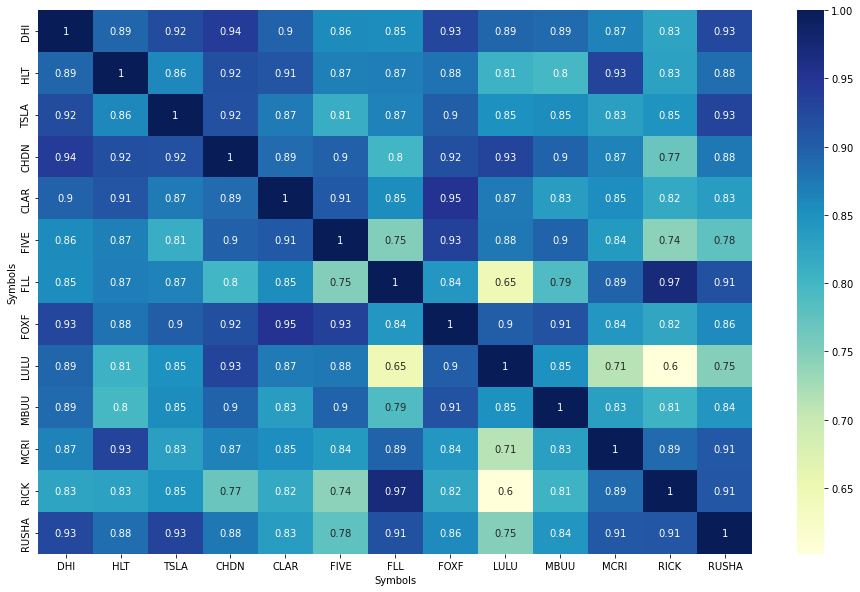

In [91]:
correlation = return_series_close.corr()
# correlation
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(correlation, annot = True, ax = ax, cmap="YlGnBu")

In [92]:
correlation = correlation[correlation < 0.1]
correlation

Symbols,DHI,HLT,TSLA,CHDN,CLAR,FIVE,FLL,FOXF,LULU,MBUU,MCRI,RICK,RUSHA
Symbols,,,,,,,,,,,,,
DHI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HLT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TSLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHDN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CLAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FOXF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LULU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Final DF for Consumer Cyclical

In [93]:
all_stocks = []
for each in correlation:
    all_stocks.append(each)

In [94]:
indexes = []
for i in range(len(df2_consumer_c)):
    each = df2_consumer_c.iloc[i]
    ticker = each["ticker"]
    if ticker in all_stocks:
        indexes.append(i)

In [95]:
chosen_consumer_c_df = df2_consumer_c.iloc[indexes]
chosen_consumer_c_df #13 stocks for consumer cyclical sector

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
65,DHI,"D.R. Horton, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,Average,81.3366,0.204622,2.897055e+10,...,11.410,0.1060,5.326562,7.128537,2.862672e+01,22.55,0.217341,0.370627,0.238886,0.630
98,HLT,Hilton Worldwide Holdings Inc.,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Sustainable,147.9550,0.134492,4.123831e+10,...,0.140,2.7265,34.408140,1056.821400,2.914266e+06,19.95,0.168718,0.314619,0.209851,0.711
199,TSLA,"Tesla, Inc.",Consumer Cyclical,Increase,Below Fair Price,OverValued,Average,806.0500,0.609586,8.094838e+11,...,3.062,0.7295,92.014840,263.242980,1.586122e+04,28.54,0.267181,0.611157,0.739589,1.234
321,CHDN,"Churchill Downs, Incorporated",Consumer Cyclical,Increase,Below Fair Price,OverValued,No Data,214.5100,0.285760,8.204814e+09,...,5.574,2.0990,23.598460,38.484030,8.037688e+05,999.00,0.165071,0.428761,0.357716,0.867
326,CLAR,Clarus Corporation,Consumer Cyclical,Increase,Below Fair Price,UnderValued,No Data,21.4100,0.104810,7.919045e+08,...,0.554,0.3290,13.993464,38.646206,3.935781e+01,999.00,0.122525,0.393534,0.306635,0.903
437,FIVE,"Five Below, Inc.",Consumer Cyclical,Increase,Below Fair Price,OverValued,No Data,159.6400,0.196712,8.943895e+09,...,4.662,0.4612,27.242321,34.242813,6.889982e+02,999.00,0.178443,0.452922,0.332526,0.784
442,FLL,"Full House Resorts, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,No Data,8.7500,0.119495,2.994906e+08,...,0.331,0.1500,19.444445,26.435045,4.375000e+00,999.00,0.240438,0.704348,0.296359,0.731
452,FOXF,Fox Factory Holding Corp.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,No Data,120.9000,0.205780,5.090374e+09,...,3.731,0.1500,23.613281,32.404182,6.045000e+01,999.00,0.230713,0.462622,0.367678,0.717
616,LULU,lululemon athletica inc.,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Sustainable,304.5800,0.164012,3.938189e+10,...,6.661,0.2790,32.927567,45.725870,3.964841e+02,16.06,0.179658,0.392863,0.361296,0.969
625,MBUU,"Malibu Boats, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,No Data,67.3700,0.142686,1.403971e+09,...,5.497,0.1500,8.715395,12.255775,3.368500e+01,999.00,0.229497,0.490083,0.277316,0.617


In [96]:
chosen_consumer_c_df.to_csv("selected_stocks_consumer_c.csv")

# Putting everything into 1 DF

In [97]:
final_df_aggressive = pd.concat([chosen_tech_df, chosen_healthcare_df, chosen_realestate_df, chosen_industrials_df, chosen_consumer_c_df])
final_df_aggressive

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
639,MGIC,Magic Software Enterprises Ltd.,Technology,Increase,Above Fair Price,UnderValued,No Data,18.30,0.134997,9.082454e+08,...,0.570,0.1000,17.428572,32.105263,6.133024,999.00,0.188167,0.334100,0.227677,0.657
686,NSIT,"Insight Enterprises, Inc.",Technology,Increase,Above Fair Price,UnderValued,No Data,99.40,0.162830,3.467649e+09,...,5.767,0.0744,12.925878,17.235998,26.950686,999.00,0.234360,0.366896,0.221251,0.655
708,ON,ON Semiconductor Corporation,Technology,Increase,Below Fair Price,UnderValued,Average,58.44,0.204125,2.517794e+10,...,1.532,0.5545,17.926380,38.146214,440.267051,26.16,0.230713,0.507655,0.343777,0.779
751,POWI,"Power Integrations, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,87.75,0.172236,5.294107e+09,...,2.458,0.2529,26.753050,35.699757,94.882094,999.00,0.138328,0.396886,0.226355,0.720
781,RIOT,"Riot Blockchain, Inc",Technology,Increase,Above Fair Price,UnderValued,No Data,15.95,0.208131,1.859499e+09,...,0.188,0.2000,8.763736,84.840430,11.697185,999.00,0.539473,1.229896,0.422364,0.903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,LULU,lululemon athletica inc.,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Sustainable,304.58,0.164012,3.938189e+10,...,6.661,0.2790,32.927567,45.725870,396.484079,16.06,0.179658,0.392863,0.361296,0.969
625,MBUU,"Malibu Boats, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,No Data,67.37,0.142686,1.403971e+09,...,5.497,0.1500,8.715395,12.255775,33.684998,999.00,0.229497,0.490083,0.277316,0.617
629,MCRI,"Monarch Casino & Resort, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,No Data,73.28,0.212274,1.373003e+09,...,3.315,0.1400,16.654545,22.105580,33.870262,999.00,0.223419,0.466259,0.268473,0.667
780,RICK,"RCI Hospitality Holdings, Inc.",Consumer Cyclical,Increase,Below Fair Price,UnderValued,No Data,63.27,0.212191,6.010593e+08,...,3.369,0.4000,12.704820,18.780054,185.797390,999.00,0.258672,0.608473,0.302701,0.711


In [98]:
final_df_aggressive.to_csv("selected_stocks_aggressive.csv")